<span style="color: blue; font-size: 20px; font-weight: bold;">Комментарий ревьюера</span>

<span style="color: blue">Привет, Александр! Меня зовут Павел Григорьев, и я буду проверять этот проект.<br>Моя основная цель - не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь тебе совершенствоваться как профессионалу.<br>Спасибо за проделанную работу! Предлагаю общаться на «ты».</span>
<details>
	<summary><u>Инструкция по организационным моментам (кликабельно)</u>⤵</summary>
<span style="color: blue">Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</span>


---


<span style="color: blue">синий текст - просто текст комментария</span>

<span style="color: green">✔️ и зеленый текст - все отлично</span>

<span style="color: orange">⚠️ и оранжевый текст - сделано все правильно, однако есть рекомендации, на что стоит обратить внимание</span>

<span style="color: red">❌ и красный текст - есть недочеты</span>


</details>    
</br>
<span style="color: blue">Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты, а также сразу увидеть исправленное.</span>

<span style="color: blue">Ответы на мои комментарии лучше тоже помечать.<br>
Например: </span><br><span style="color: purple; font-weight: bold">Комментарий студента</span>

<span style="color: blue; font-weight: bold;">Давай смотреть, что получилось!</span>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Загрузка-данных-и-знакомство" data-toc-modified-id="Загрузка-данных-и-знакомство-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка данных и знакомство</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод:</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Построение-пайплайна" data-toc-modified-id="Построение-пайплайна-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Построение пайплайна</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

### Импорт библиотек


In [1]:
!pip install scikit-learn==1.1.3 -q 
!pip install statsmodels -q
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Хорошее оформление импортов! \
Импорты собраны в одной ячейке, разделены на функциональные группы пустой строкой.</font>

<font color='blue'><b>Комментарий ревьюера : </b></font> ⚠️\
<font color='darkorange'> Пипы лучше размещать отдельно от импортов, что бы не запускать этот код, если понадобится дополнять или редактировать импорты.</font>

### Загрузка данных и знакомство 

In [2]:
df = pd.read_csv('/datasets/taxi.csv', parse_dates=[0], index_col='datetime')

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Здорово, что время сразу в индексе!</font>

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [4]:
df = df.sort_index()
print(df.index.is_monotonic_increasing)

True


In [5]:
df = df.resample('1H').sum()

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Ресемплирование по часу выполнено верно. Супер, что значения просуммированы, это проще интерпретируется, чем использование других агрегационных функций.</font>

## Анализ

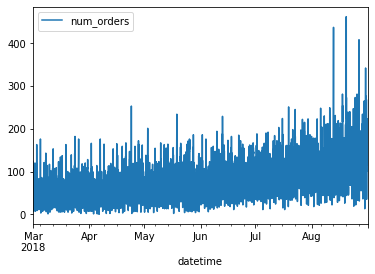

In [6]:
df.plot();

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Есть график временного ряда! </font>

Разложу временной ряд на тренд\сезонность\остатки

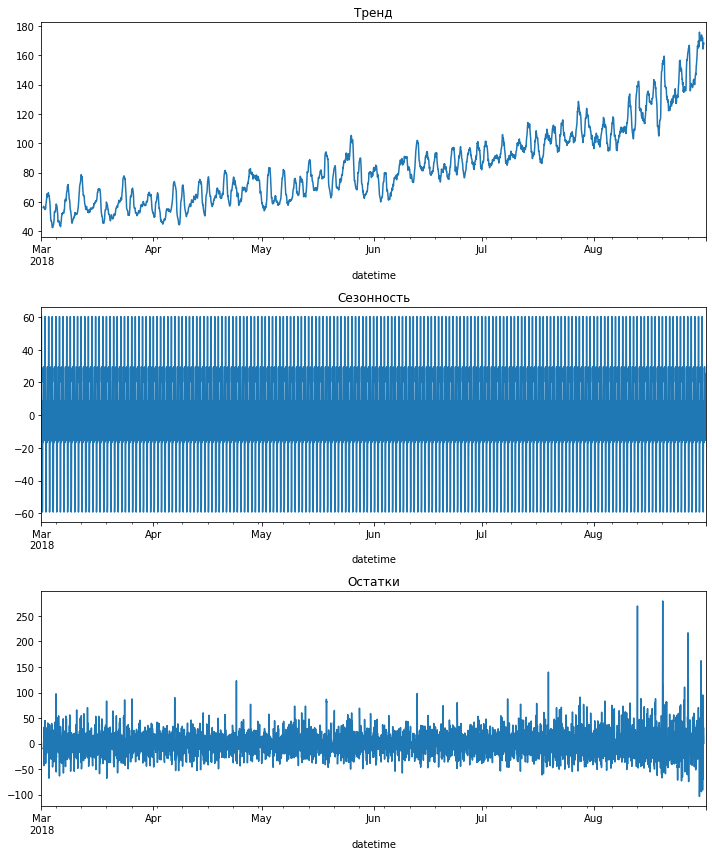

In [7]:
decomposed = seasonal_decompose(df)

plt.figure(figsize=(10, 12))

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Тренд')

plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Сезонность')

plt.subplot(313)
decomposed.resid.plot(ax=plt.gca()) 
plt.title('Остатки')

plt.tight_layout()

### Вывод:
1. Заметен тренд увеличения заказов с марта по сентябрь
2. Сезонность явности не дает. Возможно меньшие временные промежутки были бы более информативны
3. Остатки неимзенны

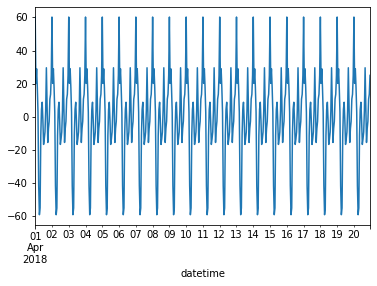

In [8]:
decomposed.seasonal['2018-04-01':'2018-04-20'].plot();

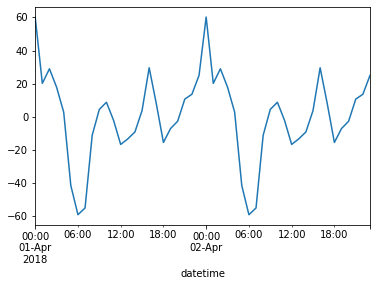

In [9]:
decomposed.seasonal['2018-04-01':'2018-04-02'].plot();

### Вывод:
Практически одиннаковое распределене зказов по часам.<br><br>

Минимальное количество заказов наблюдается в 6 утра. Наблюдается рост в утренние часы до обеда, после обеда и на ночных рейсах (в полночь)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Здорово, что сезонность рассмотренна на различных временных интервалах.</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Если ресемлировать ряд по дню и вывести интервал сезонной компоненты около месяца, то можно увидеть сезонность внутри недели.</font>

## Обучение

In [10]:
def make_features(data, max_lag, rolling_mean_size):
    df = data.copy()
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['dayofweek'] = df.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        df['lag_{}'.format(lag)] = df['num_orders'].shift(lag)

    df['rolling_mean'] = df['num_orders'].shift().rolling(rolling_mean_size).mean()
    
    return df

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'>На мой взгляд: не все признаки подходят, чисто логически. Выскажу свою позицию:<br>

<font color='red'>1) Признак год: НЕТ, однозначно не подходит. У нас данных меньше года. Поэтому будет просто константа.<br>
2) Признак месяц: НЕТ, аналогично году, у нас в истории всего один март, май.... Да и горизонт прогноза - часы. Поэтому сезонность времени года будет просто в тренде уже заложена.</font><br>
<font color='darkorange'>3) Признак день: НЕТ, также не подходит, у нас нет сезонности внутри месяца, будет просто последовательность чисел.<br></font>
<font color='green'>4) Признак день недели: ДА, т.к. у нас есть недельная сезонность.<br>
5) Признак час: ДА, т.к. есть часовая (суточная) сезонность.<br>
6) Признак lag: ДА, это параметр авторегрессии - учёт влияния вчерашних событий на сегодняшние.<br>
7) Признак rolling: ДА, это аналог тренда. Чем больше окно сглаживания, тем ровнее линия тренда.</font> <br>

<font color='red'>Как ты думаешь?</font>

In [11]:
df_new = make_features(df, 90, 2)

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Временной сдвиг лучше определить с учётом выявленных сезонностей\
Или можно подобрать лучшее сочетание предиктеров в цикле.</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'>Можно, так же, посмотреть Автокорреляцию и оставить только значимые Лаги. Чем меньше признаков - тем модели проще расчитать прогноз. [Автокоррелеляция](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html)</font>

In [12]:
train, test = train_test_split(df_new, shuffle=False, test_size=0.1)
train = train.dropna()
test = test.dropna()
    
X_train = train.drop(['num_orders'], axis=1) 
y_train = train['num_orders']

X_test = test.drop(['num_orders'], axis=1) 
y_test = test['num_orders']

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Верно, что запрещаешь перемешивание отчётов.</font>

### Построение пайплайна

In [13]:
pipe_final = Pipeline([
    ('models', DecisionTreeRegressor(random_state=42))
])

In [14]:
param_distributions = [
    {
        'models': [DecisionTreeRegressor(random_state=42)],
        'models__max_depth': range(2, 7),
        'models__min_samples_leaf': range(2, 7)
    },
    {
        'models': [LinearRegression()]
    }, 
] 

In [15]:
grid = GridSearchCV(
    pipe_final, 
    param_grid=param_distributions, 
    cv=TimeSeriesSplit(n_splits=5), 
    scoring='neg_root_mean_squared_error', 
    n_jobs=-1, 
)

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> При кроссвалидации также нельзя разбивать выборки так, что бы проверочные данные были раньше обучающих. К сожалению, стандартное разбиение Kfold такого условия не обеспечивает. Нужно передать специальный Сплитер - [TimeSeriesSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html).</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> \
<font color='blue'>Если мы исследуем временной ряд, то в каждом сплите тестовые индексы должны быть позже по времени, чем обучающие, поэтому перетасовка обычным способом неуместна. Как раз TimeSeriesSplit решает эту проблему.\
Иллюстрация работы:\
</font>
![image.png](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_013.png)

Код реализации:
```python
tscv = TimeSeriesSplit(n_splits=3)
gsearch = GridSearchCV(estimator=model, cv=tscv,
                      scoring = 'neg_root_mean_squared_error',
                      param_grid=param_search)
gsearch.fit(X, y)
```

In [16]:
grid.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=Pipeline(steps=[('models',
                                        DecisionTreeRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid=[{'models': [DecisionTreeRegressor(max_depth=6,
                                                           min_samples_leaf=6,
                                                           random_state=42)],
                          'models__max_depth': range(2, 7),
                          'models__min_samples_leaf': range(2, 7)},
                         {'models': [LinearRegression()]}],
             scoring='neg_root_mean_squared_error')

In [17]:
print('Метрика RMSE подобранной модели:', round(-grid.best_score_, 2)) 
print('Лучшая модель и её параметры:', grid.best_params_) 

Метрика RMSE подобранной модели: 28.24
Лучшая модель и её параметры: {'models': DecisionTreeRegressor(max_depth=6, min_samples_leaf=6, random_state=42), 'models__max_depth': 6, 'models__min_samples_leaf': 6}


## Тестирование

In [18]:
y_pred = grid.predict(X_test)
print(f'Метрика RMSE на тестовой выборке: {round(mean_squared_error(y_test, y_pred, squared=False), 4)}')

Метрика RMSE на тестовой выборке: 46.4095


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Тестирование проведено верно.</font>

### Вывод:
1. Был проанализирован временной ряд количества заказов такси у аэропорта с целью предложения модели для предсказания количества заказов на будушие часы.

2. Было проведено ресемплирование временного ряда по 1 часу.

3. Были обучены две модели для задач регрессии: дерево решений и линейная регрессия. 

4. Для обучения были созданы дополнительные признаки: год, месяц, день месяца и день недели, разное количество "отстающих" значений, а также скользящее среднее.

5. Модель дерева решений показало себя лучше. Значение метрики удовлетворяет условию = 46.41

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Очень приятно видеть вывод в конце проекта!\
Приведены ответы на главные вопросы проекта.</font>

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>\
<font color='green'>Александр, хороший проект получился!
Большое спасибо за проделанную работу. Видно, что приложено много усилий.
</font>

<font color='blue'>Что нужно исправить:</font>
<ul><font color='red'>Не используй признаки "год" и "месяц" на данных меньше года.</font></ul>
<ul><font color='red'>Проводи кроссвалидацию и подбор гиперпараметров с использованием специального Сплиттера.</font></ul>

<font color='blue'>Что можно сделать лучше:</font>
<font color='orange'>В работе я оставил несколько советов. Буду рад, если ты учтешь их.</font></ul>

<font color='blue'><b>Жду новую версию проекта :)</b></font>

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Данные загружены и подготовлены
- [ ]  Данные проанализированы
- [ ]  Модель обучена, гиперпараметры подобраны
- [ ]  Качество моделей проверено, выводы сделаны
- [ ]  Значение *RMSE* на тестовой выборке не больше 48